In [1]:
import duckdb
con = duckdb.connect("mini_dw.duckdb")

In [2]:
con.execute("CREATE SCHEMA IF NOT EXISTS dw")

con.execute("""
    CREATE TABLE IF NOT EXISTS dw.dim_product AS
    SELECT * FROM read_csv_auto('data/dim/dim_product.csv')
""")

con.execute("""
    CREATE TABLE IF NOT EXISTS dw.fact_sales AS
    SELECT * FROM read_csv_auto('data/fact/fact_sales.csv')
""")


In [3]:
query = """
    SELECT strftime(order_date, '%Y-%m') AS ym,
           SUM(amount) AS total_sales
    FROM dw.fact_sales
    GROUP BY ym
    ORDER BY ym
"""

df = con.execute(query).df()
df


,ym,total_sales
0,2023-01,420.0


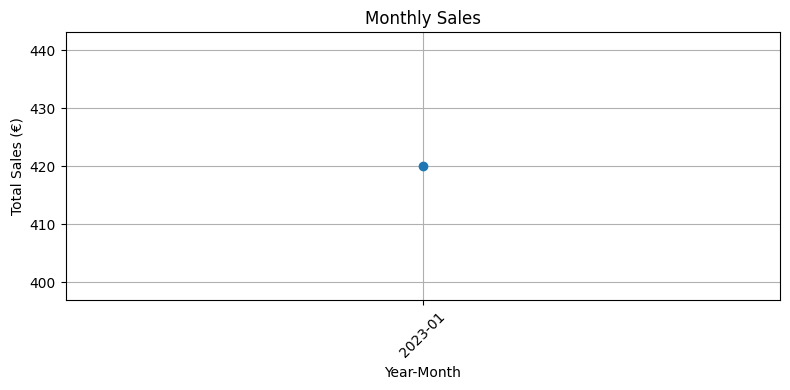

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(df['ym'], df['total_sales'], marker='o', linestyle='-')
plt.title("Monthly Sales")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales (€)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



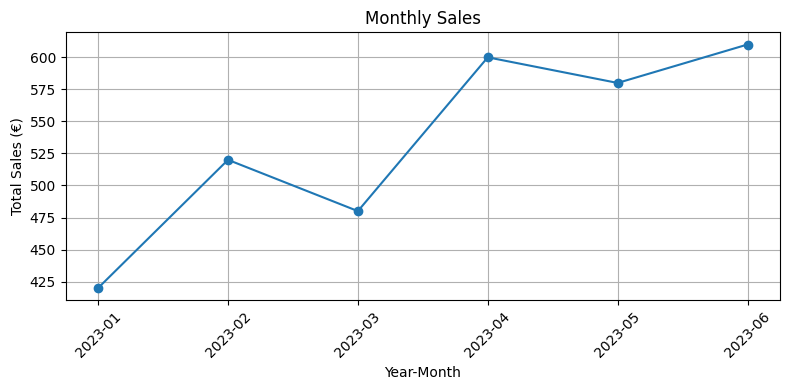

In [6]:
import pandas as pd

df_test = pd.DataFrame({
    "ym": ["2023-01", "2023-02", "2023-03", "2023-04", "2023-05", "2023-06"],
    "total_sales": [420.0, 520.0, 480.0, 600.0, 580.0, 610.0]
})

plt.figure(figsize=(8, 4))
plt.plot(df_test['ym'], df_test['total_sales'], marker='o', linestyle='-')
plt.title("Monthly Sales")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales (€)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
df.to_csv("data/output/monthly_sales.csv", index=False)


# Projet d'analyse DuckDB : Modélisation et visualisation des données de ventes

## Contexte du projet

Ce projet applique les principes simplifiés d'un entrepôt de données pour réaliser un flux complet : nettoyage des données, modélisation avec DuckDB, analyse SQL multidimensionnelle, puis visualisation avec Python.

---

## 1. Préparation et nettoyage des données

Nous disposons de deux fichiers CSV bruts :

- `fact_sales.csv` : table de faits contenant les commandes (montant, date, produit, etc.)
- `dim_product.csv` : table de dimension produits (ID produit, nom, etc.)

Après nettoyage avec `pandas`, les données sont sauvegardées sous forme structurée :

- `dim/dim_product.csv`
- `fact/fact_sales.csv`

---

## 2. Importation dans DuckDB

Nous utilisons DuckDB pour créer une base locale avec :

- Nom de la base : `mini_dw.duckdb`
- Schéma : `dw`
- Tables :
  - `dw.dim_product`
  - `dw.fact_sales`

Les fichiers CSV sont chargés via `read_csv_auto(...)` avec `CREATE TABLE IF NOT EXISTS`.

---

##  3. Analyse : total des ventes par mois

Requête SQL exécutée :

```sql
SELECT strftime(order_date, '%Y-%m') AS ym,
       SUM(amount) AS total_sales
FROM dw.fact_sales
GROUP BY ym
ORDER BY ym


---

##  4. Visualisation : graphique des ventes mensuelles

Avec `matplotlib.pyplot`, on génère un graphique en ligne :

- Axe X : mois  
- Axe Y : total des ventes (€)  
- Format : ligne + points  

Le graphique montre l’évolution des ventes dans le temps.

---

## 5. Exportation des résultats

Les résultats sont sauvegardés dans le fichier suivant :

```bash
data/output/monthly_sales.csv
